In [28]:
import roboticstoolbox as rtb
import numpy as np
from spatialmath import SE3

class Planar2(rtb.DHRobot):
    """
    Class that models a planar 2-link robot

    ``Planar2()`` is a class which models a 2-link planar robot and
    describes its kinematic characteristics using standard DH
    conventions.

    .. runblock:: pycon

        >>> import roboticstoolbox as rtb
        >>> robot = rtb.models.DH.Planar2()
        >>> print(robot)

    Defined joint configurations are:

        - qz, zero angles, all folded up
        - q1, links are horizontal and vertical respectively
        - q2, links are vertical and horizontal respectively

    .. note::

      - Robot has only 2 DoF.

    .. codeauthor:: Peter Corke
    """

    def __init__(self, symbolic = False):

        if symbolic:
            import spatialmath.base.symbolic as sym

            zero = sym.zero()
            pi = sym.pi()
            a1, a2 = sym.symbol("a1 a2")  # type: ignore
        else:
            from math import pi

            zero = 0.0
            a1 = 1
            a2 = 1

        L = [rtb.RevoluteDH(a=a1, alpha=zero), rtb.RevoluteDH(a=a2, alpha=zero)]

        super().__init__(L, name="Planar 2 link", keywords=("planar",))

        self.qr = np.array([0, pi / 2])
        self.qz = np.zeros(2)

        self.addconfiguration("qr", self.qr)
        self.addconfiguration("qz", self.qz)

        self.addconfiguration_attr("q1", np.array([0, pi / 2]))
        self.addconfiguration_attr("q2", np.array([pi / 2, -pi / 2]))


In [29]:
robot = Planar2()
print(robot)

DHRobot: Planar 2 link, 2 joints (RR), dynamics, standard DH parameters
┌────┬────┬────┬──────┐
│θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├────┼────┼────┼──────┤
│ q1 │  0 │  1 │ 0.0° │
│ q2 │  0 │  1 │ 0.0° │
└────┴────┴────┴──────┘

┌─┬──┐
└─┴──┘

┌─────┬──────┬──────┐
│name │ q0   │ q1   │
├─────┼──────┼──────┤
│  qr │  0°  │  90° │
│  qz │  0°  │  0°  │
│  q1 │  0°  │  90° │
│  q2 │  90° │ -90° │
└─────┴──────┴──────┘



DHRobot: Planar 2 link, 2 joints (RR), dynamics, standard DH parameters
┌────┬────┬────┬──────┐
│θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├────┼────┼────┼──────┤
│ q1 │  0 │  1 │ 0.0° │
│ q2 │  0 │  1 │ 0.0° │
└────┴────┴────┴──────┘

┌─┬──┐
└─┴──┘

┌─────┬──────┬──────┐
│name │ q0   │ q1   │
├─────┼──────┼──────┤
│  qr │  0°  │  90° │
│  qz │  0°  │  0°  │
│  q1 │  0°  │  90° │
│  q2 │  90° │ -90° │
└─────┴──────┴──────┘



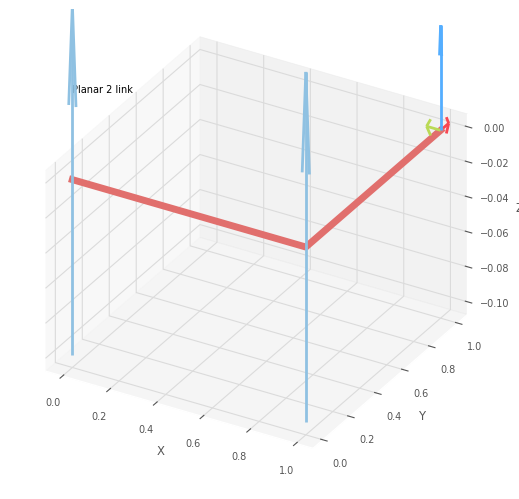

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'Planar 2 link')

<Figure size 640x480 with 0 Axes>

In [31]:
qt = rtb.tools.trajectory.jtraj(robot.q1, robot.q2, 50)
print(robot)
qt = rtb.jtraj(robot.q1, robot.q2, 50)
robot.plot(qt.q, backend='pyplot', movie='planar.gif')